## pandas par l'exemple



### Analyse des prénoms parisiens depuis 2004



#### Lecture & importation de fichier de données



Commençons par l'importation du module `pandas`



In [0]:
import pandas as pd

Nous allons nous intéresser dans ce *notebook* à l'historique des prénoms déclarés à l'état-civil de
2004 à 2019 sur la ville de Paris. Ces données sont téléchargeables depuis le site
[https://data.gouv.fr](https://data.gouv.fr) et, pour le fichier qui nous intéresse, à cette [adresse](https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86). Une fois le fichier
téléchargé, nous pouvons jeter un coup d'oeil aux premières lignes



In [8]:
!head data/liste_des_prenoms.csv

head: cannot open 'data/liste_des_prenoms.csv' for reading: No such file or directory


Le fichier brut présente ainsi 5 colonnes dont l'intitulé se trouve à la première ligne. Nous allons
charger ce fichier dans un objet de type `pandas.DataFrame` afin de pouvoir le manipuler



In [0]:
data = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/30800be0-8b72-4e89-9ecf-58ea7dedfe86", sep=";")

Les commandes `head()/tail()` permettent d'avoir un aperçu des premières/dernières lignes du `DataFrame`



In [10]:
data.head()

,Nombre,Sexe,Annee,Prenoms,Nombre total cumule par annee
0,7,M,2013,Aydan,7
1,6,F,2013,Béatrice,6
2,6,M,2013,Boubacar,6
3,5,M,2013,Camilo,5
4,14,M,2013,Charly,14


Les indices et les colonnes sont



In [11]:
data.index, data.columns

(RangeIndex(start=0, stop=20453, step=1),
 Index(['Nombre', 'Sexe', 'Annee', 'Prenoms', 'Nombre total cumule par annee'], dtype='object'))

tandis que la "forme" et le type de données sont accessibles *via*



In [12]:
data.shape, data.dtypes

((20453, 5), Nombre                            int64
 Sexe                             object
 Annee                             int64
 Prenoms                          object
 Nombre total cumule par annee     int64
 dtype: object)

#### Premier analyse & manipulation des données



Dans un premier temps, nous allons renommer la colonne "Nombre total cumule par annee" en "Cumul"
afin de pouvoir accéder à cette colonne plus facilement



In [0]:
data.rename(columns={"Nombre total cumule par annee": "Cumul"}, inplace=True)

À la lecture des premières lignes, on peut également se poser la question de la différence entre les
données de la colonne "Nombre" et "Cumul". Nous allons dénombrer les lignes pour lesquels ces deux
valeurs sont différentes



In [14]:
import numpy as np
mask = (data.Cumul - data.Nombre != 0)
print(np.sum(mask), "sur un total de", data.shape[0], "lignes")

232 sur un total de 20453 lignes


puis afficher ces lignes pour tenter de comprendre l'origine de la différence



In [15]:
data[mask]

,Nombre,Sexe,Annee,Prenoms,Cumul
43,6,F,2013,Sacha,156
150,29,F,2015,Charlie,35
196,5,F,2015,Swann,22
265,8,F,2016,Sacha,146
364,98,F,2018,Camille,191
...,...,...,...,...,...
20286,33,F,2017,Eden,89
20324,44,F,2017,Sasha,74
20383,17,F,2018,Maxime,119
20395,85,F,2018,Nour,92


Il semble que les différences sont dues aux prénoms mixtes. Affichons les lignes associées au prénom
"Camille"



In [16]:
data[data.Prenoms == "Camille"]

,Nombre,Sexe,Annee,Prenoms,Cumul
364,98,F,2018,Camille,191
1563,187,F,2013,Camille,258
3035,82,M,2012,Camille,82
5176,43,M,2009,Camille,43
5177,230,F,2009,Camille,273
5494,163,F,2012,Camille,245
5620,71,M,2013,Camille,71
8751,243,F,2004,Camille,275
9053,29,M,2005,Camille,29
10767,97,M,2019,Camille,97


On constate bien que la valeur cumulée correspond à la somme par année des occurences de "Camille"
garçons comme filles. Par la suite, nous allons traiter chaque population de façon distincte, nous
pouvons donc supprimer cette colonne



In [17]:
data.pop("Cumul")

0         7
1         6
2         6
3         5
4        14
         ..
20448    10
20449     9
20450     9
20451     8
20452     8
Name: Cumul, Length: 20453, dtype: int64

Une fois cette première sélection réalisée, nous pouvons avoir un rapide aperçu des propriétés
statistiques du fichier et de chaque colonne à l'aide de la fonction `describe()`



In [18]:
data.describe()

,Nombre,Annee
count,20453.000000,20453.000000
mean,24.638928,2011.599130
std,37.645943,4.572472
min,5.000000,2004.000000
25%,7.000000,2008.000000
50%,11.000000,2012.000000
75%,25.000000,2016.000000
max,398.000000,2019.000000


La valeur moyenne du nombre d'occurences d'un prénom est ainsi voisine de ~25 tandis que la valeur
médiane est à 11. La distribution du nombre d'occurences est ainsi totalement asymétrique comme nous
pouvons le voir en représentant la distribution de ces valeurs



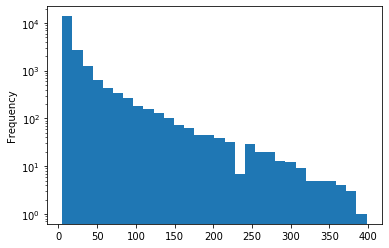

In [19]:
data.Nombre.plot.hist(log=True, bins=30);

#### Aggrégation & tri de valeurs



Les données fournis par le fichier sont désordonnées aussi bien du point de vue des années que des
prénoms. Nous pouvons trier ces données en les ordonnant temporellement à l'aide de la fonction
`sort_values()`



In [20]:
data.sort_values(by="Annee")

,Nombre,Sexe,Annee,Prenoms
2516,6,M,2004,Sebastian
13070,5,F,2004,Karen
13069,5,M,2004,Karamoko
13068,7,M,2004,Kamel
13067,8,M,2004,Johann
...,...,...,...,...
1994,8,M,2019,Gauthier
1995,8,M,2019,Siméon
10805,12,F,2019,Eléa
1984,12,M,2019,Bilal


L'argument `by` peut tout à la fois prendre le nom du colonne ou une liste de noms de colonnes afin de
réaliser un tri successif selon chaque colonne. Ainsi pour trier par année puis, de façon
décroissante, par nombre, nous pouvons écrire



In [21]:
data.sort_values(by=["Annee", "Nombre"], ascending=False)

,Nombre,Sexe,Annee,Prenoms
18324,371,M,2019,Gabriel
8155,292,M,2019,Adam
6995,282,M,2019,Arthur
12046,272,M,2019,Raphaël
11213,271,M,2019,Louis
...,...,...,...,...
19380,5,M,2004,Karamba
19388,5,F,2004,Malena
19394,5,M,2004,Natan
19401,5,F,2004,Rana


On peut également grouper les valeurs selon une colonne. La fonction `groupby()` permet, par exemple,
de regrouper les valeurs par année et d'extraire par la suite le nombre total de naissance par année



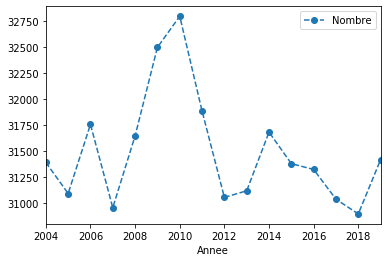

In [22]:
data.groupby("Annee").sum().plot(style="--o");

On peut également regrouper les naissances en fonction de l'année et du sexe des enfants



In [23]:
data.groupby(["Annee", "Sexe"]).sum()

Nombre
Annee Sexe        
2004  F      14791
      M      16601
2005  F      14890
      M      16203
2006  F      15107
      M      16650
2007  F      14604
      M      16353
2008  F      15161
      M      16486
2009  F      15642
      M      16855
2010  F      15699
      M      17097
2011  F      15267
      M      16618
2012  F      14662
      M      16394
2013  F      14797
      M      16322
2014  F      15076
      M      16607
2015  F      15043
      M      16337
2016  F      14968
      M      16356
2017  F      14724
      M      16314
2018  F      14793
      M      16104
2019  F      14959
      M      16460

En groupant les données selon deux catégories (Année, Sexe), on obtient un nouvel objet `DataFrame`
dont les indices sont des couples (Année, Sexe)



In [24]:
data1 = data.groupby(["Annee", "Sexe"]).sum()
data1.index

MultiIndex([(2004, 'F'),
            (2004, 'M'),
            (2005, 'F'),
            (2005, 'M'),
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M'),
            (2011, 'F'),
            (2011, 'M'),
            (2012, 'F'),
            (2012, 'M'),
            (2013, 'F'),
            (2013, 'M'),
            (2014, 'F'),
            (2014, 'M'),
            (2015, 'F'),
            (2015, 'M'),
            (2016, 'F'),
            (2016, 'M'),
            (2017, 'F'),
            (2017, 'M'),
            (2018, 'F'),
            (2018, 'M'),
            (2019, 'F'),
            (2019, 'M')],
           names=['Annee', 'Sexe'])

La fonction `unstack()` permet alors de transformer cet objet afin de disposer du nombre de naissances
par sexe en fonction de l'année



In [25]:
data1.unstack()

Nombre       
Sexe       F      M
Annee              
2004   14791  16601
2005   14890  16203
2006   15107  16650
2007   14604  16353
2008   15161  16486
2009   15642  16855
2010   15699  17097
2011   15267  16618
2012   14662  16394
2013   14797  16322
2014   15076  16607
2015   15043  16337
2016   14968  16356
2017   14724  16314
2018   14793  16104
2019   14959  16460

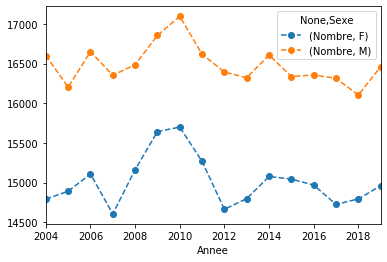

In [26]:
data1.unstack().plot(style="--o")

Finalement, pour trouver les noms les plus utilisés en fonction des années et du sexe de l'enfant,
on peut utiliser la fonction `max()` qui retourne, après avoir groupé les données, les valeurs
maximales **par colonne**



In [27]:
data.groupby(["Annee", "Sexe"]).max()

Nombre   Prenoms
Annee Sexe                  
2004  F        268    Émilie
      M        320  Zinedine
2005  F        283       Éva
      M        329      Éric
2006  F        282       Éva
      M        314   Étienne
2007  F        265       Éva
      M        311      Éric
2008  F        288       Éva
      M        316     Émile
2009  F        322       Éva
      M        350     Éthan
2010  F        335       Éva
      M        398      Éric
2011  F        306       Éva
      M        374     Émile
2012  F        307       Éva
      M        371   Étienne
2013  F        346       Éva
      M        381   Étienne
2014  F        310       Éva
      M        369     Éthan
2015  F        292       Éva
      M        356   Étienne
2016  F        291       Éva
      M        370   Étienne
2017  F        221       Éva
      M        379   Étienne
2018  F        226       Éva
      M        338  Ézéchiel
2019  F        223       Éva
      M        371   Étienne

Les prénoms affichés correspondent aux valeurs "maximales" soit, pour des chaines de caractères, au
tri alphabétique : Zinédine n'est pas le prénom le plus utilisé en 2004. En revanche, le nombre
maximal de fois où un prénom a été donné correspond bien aux valeurs portées par la colonne
"Nombre". Il s'agit donc pour ces valeurs de trouver les prénoms associés. On peut alors chercher
les indices correspondant à ces valeurs maximales *via* la fonction `idxmax()`



In [28]:
data.groupby(["Annee", "Sexe"]).idxmax()

Nombre
Annee Sexe        
2004  F      12468
      M       8569
2005  F       2543
      M      14610
2006  F      18292
      M      12111
2007  F      15420
      M      16441
2008  F       6192
      M       9656
2009  F       3789
      M      10149
2010  F       1305
      M      10208
2011  F       8545
      M      10256
2012  F       3165
      M       2023
2013  F       6661
      M      10406
2014  F      11757
      M      16934
2015  F      10975
      M       2718
2016  F      11051
      M       4784
2017  F       3472
      M       4838
2018  F      19825
      M      14108
2019  F       3564
      M      18324

puis d'afficher ces lignes



In [29]:
data.iloc[data.groupby(["Annee", "Sexe"]).idxmax()["Nombre"]]

,Nombre,Sexe,Annee,Prenoms
12468,268,F,2004,Inès
8569,320,M,2004,Alexandre
2543,283,F,2005,Inès
14610,329,M,2005,Alexandre
18292,282,F,2006,Emma
12111,314,M,2006,Raphaël
15420,265,F,2007,Louise
16441,311,M,2007,Gabriel
6192,288,F,2008,Louise
9656,316,M,2008,Gabriel


#### Pivoter les données



Il est possible de transposer les données de telle sorte à inverser indices et colonnes. On peut
également utiliser la fonction `pivot_table()` pour déterminer la façon dont va pivoter le
`DataFrame`. Cette fonction prend 3 arguments :

-   `values` indique les valeurs selon lesquelles réaliser le pivot de la table de données,
-   `columns` permet de spécifier les valeurs qui deviendront les colonnes dans la nouvelle table,
-   `index` permet de spécifier ce qui deviendra l'index de la table pivotée.

On peut, par exemple, représenter le nombre de prénoms attribués (`values`) en fonction de l'année
(`columns`) pour chaque prénoms (`index`)



In [30]:
data.pivot_table(values="Nombre", index="Prenoms", columns="Annee")

Annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Prenoms,,,,,,,,,,,,,,,,
Aaliyah,NaN,NaN,NaN,NaN,5.0,8.0,7.0,NaN,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0
Abby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,NaN
Abd,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,NaN,5.0,5.0,9.0,NaN,NaN,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Éthan,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,5.0,6.0,5.0,5.0,NaN
Étienne,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0,5.0,NaN,13.0,5.0,5.0,6.0,6.0


On note qu'en l'absence de valeurs, `pandas` associe la valeur *Not a Number*, valeur que l'on peut
ignorer `dropna()` ou que l'on peut modifier de la façon suivante



In [31]:
data.pivot_table(values="Nombre", index="Prenoms", columns="Annee").fillna(0)

Annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Prenoms,,,,,,,,,,,,,,,,
Aaliyah,0.0,0.0,0.0,0.0,5.0,8.0,7.0,0.0,11.0,13.0,12.0,11.0,9.0,9.0,11.0,7.0
Aaron,55.0,52.0,66.0,76.0,92.0,76.0,86.0,80.0,92.0,83.0,90.0,73.0,97.0,116.0,77.0,103.0
Abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0,0.0
Abd,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
Abdallah,7.0,9.0,6.0,5.0,10.0,11.0,13.0,6.0,13.0,9.0,18.0,9.0,10.0,8.0,15.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éric,0.0,5.0,5.0,9.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Éthan,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,6.0,5.0,5.0,0.0
Étienne,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,13.0,5.0,5.0,6.0,6.0


Nous avons ainsi accès à la tendance annuelle d'un prénom en le sélectionnant



In [32]:
data.pivot_table(values="Nombre", index="Prenoms", columns="Annee").fillna(0).loc[["Patrick", "Pascal"]].astype(int)

Annee,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Prenoms,,,,,,,,,,,,,,,,
Patrick,10,8,15,7,0,7,0,6,6,0,0,6,0,0,0,0
Pascal,10,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0


Le résultat graphique est encore plus parlant



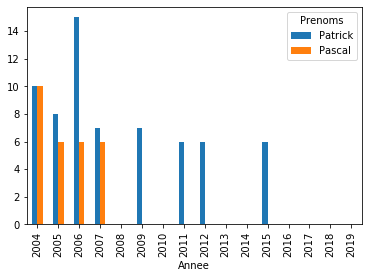

In [33]:
data.pivot_table(values="Nombre", index="Prenoms", columns="Annee").fillna(0).loc[["Patrick", "Pascal"]].T.plot.bar();

### Analyse, tri et manipulation de données temporelles



`pandas` permet de manipuler des données temporelles en facilitant notamment la lecture des dates,
heures, &#x2026; Nous allons dans cette seconde partie étudier la distribution temporelle correspondant à
la traversée du pont Fremont à Seattle en vélo. Ce notebook est une application directe du chapitre
["*Working with time series*"](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts).

Les données relevées par la ville de Seattle sont consultables à cette [adresse](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k). Nous pouvons
directement les charger dans `DataFrame` à l'aide la fonction `read_csv()` à laquelle nous indiquons
utiliser les dates de relevés comme indices



In [34]:
data = pd.read_csv("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD", parse_dates=True, index_col="Date")
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Les données donne la fréquence horaire de traversée d'Est en Ouest du pont Fremont. Afin de
faciliter la manipulation des données nous allons renommer chaque colonne



In [0]:
data.columns = ["Total", "East", "West"]

#### Visualisation des données



Afin d'avoir un rapide aperçu statistique, on peut toujours utiliser la fonction `describe()`



In [36]:
data.dropna().describe()

,Total,East,West
count,64238.000000,64238.000000,64238.000000
mean,113.910131,52.153959,61.756172
std,145.289364,67.179748,90.507860
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,148.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


ou visualiser le nombre de traversée en fonction de l'heure



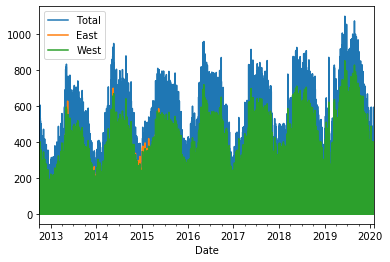

In [37]:
data.plot();

Le taux horaire de données est tel qu'il convient de rééchantillonner les valeurs par semaine



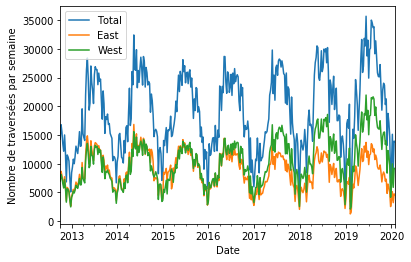

In [38]:
weekly = data.resample("W").sum()
weekly.plot().set_ylabel("Nombre de traversées par semaine");

Les données laissent clairement apparaître des variations été/hiver de même qu'une augmentation du
trafic depuis l'ouest vers l'est depuis 2017.

Nous pouvons également lisser ces courbes à l'aide d'une moyenne glissante sur la base d'un
échantillonnage journalier. On utilise à cette fin une moyenne glissante sur 30 jours à l'aide de la
fonction `rolling()`



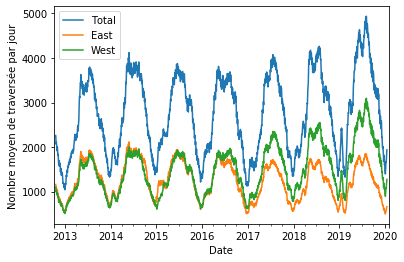

In [39]:
daily = data.resample("D").sum()
daily.rolling(30, center=True).mean().plot().set_ylabel("Nombre moyen de traversée par jour");

On peut finalement faire ce même exercice en utilisant une fonction gaussienne afin de minimiser
encore les variations (*Kernel Density Estimation*)



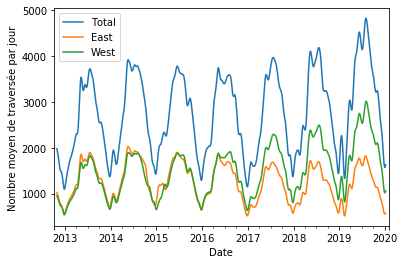

In [40]:
daily.rolling(50, center=True, win_type="gaussian").mean(std=10).plot().set_ylabel("Nombre moyen de traversée par jour");

#### Variation du trafic par heure



À l'image des prénoms, il est possible de grouper les données par heure afin d'estimer les
variations moyennes au cours d'une journée



In [41]:
by_time = data.groupby(data.index.time)
by_time.describe()

Total                               ...  West                     
           count        mean         std  min  ...   25%    50%    75%    max
00:00:00  2677.0   11.658947    8.309449  0.0  ...   3.0    6.0    9.0   81.0
01:00:00  2677.0    6.178558    5.289548  0.0  ...   1.0    3.0    5.0   86.0
02:00:00  2671.0    4.051292    3.567224  0.0  ...   1.0    2.0    3.0   22.0
03:00:00  2677.0    2.987299    3.498535  0.0  ...   0.0    1.0    2.0   20.0
04:00:00  2677.0    6.612626    4.608244  0.0  ...   1.0    3.0    4.0   70.0
05:00:00  2677.0   26.077325   17.075220  0.0  ...   4.0    9.0   15.0   54.0
06:00:00  2677.0   91.778110   64.637347  0.0  ...  12.0   32.0   54.0  142.0
07:00:00  2677.0  232.537916  171.276300  0.0  ...  21.0   73.0  131.0  335.0
08:00:00  2677.0  330.642884  224.985436  1.0  ...  38.0  117.0  198.0  538.0
09:00:00  2676.0  192.563901  101.867288  0.0  ...  44.0   79.5  122.0  357.0
10:00:00  2676.0  100.511958   43.110016  0.0  ...  30.0   46.0   63.0  620.0
11:00:00  2676.0   88.199178   49.538833  2.0  ...  24.0   38.0   55.0  619.0
12:00:00  2676.0   93.237294   55.181211  0.0  ...  25.0   41.0   59.0  566.0
13:00:00  2677.0   99.439298   57.640053  0.0  ...  28.0   44.0   64.0  456.0
14:00:00  2677.0  108.023534   57.813568  5.0  ...  33.0   53.0   73.0  298.0
15:00:00  2677.0  138.322749   61.989244  2.0  ...  49.0   76.0  101.0  254.0
16:00:00  2677.0  232.220022  122.613124  2.0  ...  80.0  132.0  216.0  420.0
17:00:00  2677.0  393.961898  254.846940  0.0  ...  82.0  278.0  437.0  850.0
18:00:00  2677.0  267.341427  170.851748  0.0  ...  63.0  177.0  271.0  485.0
19:00:00  2677.0  130.626448   84.690813  0.0  ...  39.0   74.0  117.0  246.0
20:00:00  2677.0   75.252521   49.960460  0.0  ...  22.0   40.0   61.0  155.0
21:00:00  2677.0   48.405304   34.952013  0.0  ...  14.0   24.0   38.0  407.0
22:00:00  2677.0   31.914830   23.790979  0.0  ...  10.0   16.0   24.0  482.0
23:00:00  2677.0   21.058648   18.672736  0.0  ...   6.0   11.0   16.0  251.0

[24 rows x 24 columns]

et de représenter graphiquement ces données



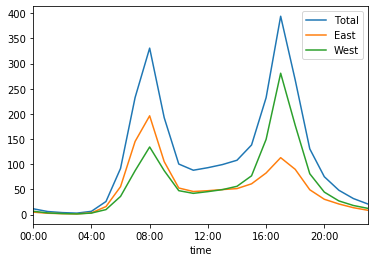

In [42]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.mean().plot(xticks=hourly_ticks);

La distribution est bimodale est fonction des heures de travail (8h le matin, 17h l'après midi) et
les traversées s'inversent bien (la direction est/ouest correspond au trafic agglomération vers
centre-ville)

Nous pouvons également nous intéresser à la fréquence de traversée en fonction du jour et vérifier
que l'utilisation du vélo se fait majoritairement pour se rendre au travail



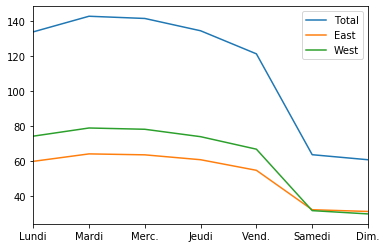

In [43]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Lundi", "Mardi", "Merc.", "Jeudi", "Vend.", "Samedi", "Dim."]
by_weekday.plot();

Finalement, nous pouvons grouper les deux informations heure et jour et comparer les distributions
en fonction du jour de la semaine



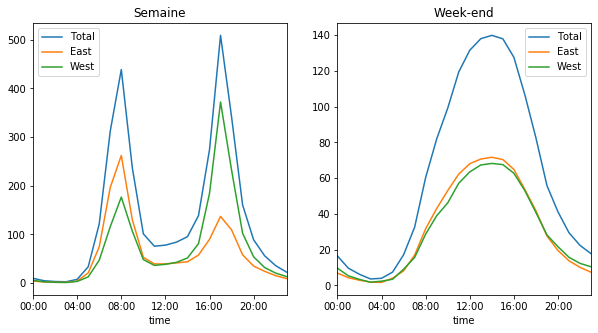

In [44]:
weekend = np.where(data.index.weekday < 5, "Semaine", "Week-end")
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10,5))
by_time.loc["Semaine"].plot(ax=ax[0], title="Semaine", xticks=hourly_ticks)
by_time.loc["Week-end"].plot(ax=ax[1], title="Week-end", xticks=hourly_ticks);